<AxesSubplot: xlabel='Age', ylabel='Name'>

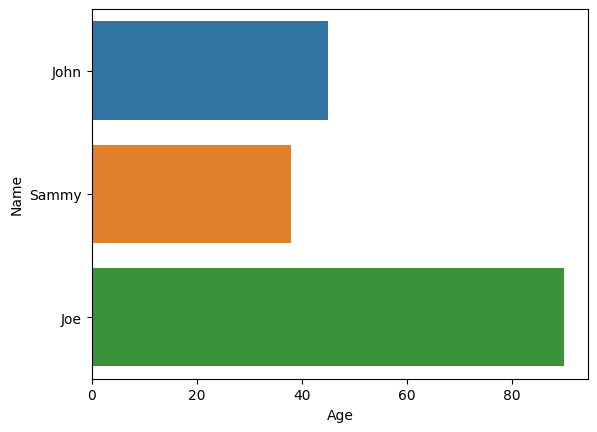

In [2]:
# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
# importing seaborn library
import seaborn as sns
    
# creating dataframe
df = pd.DataFrame({
    'Name': ['John', 'Sammy', 'Joe'],
    'Age': [45, 38, 90]
})

# plotting a bar graph
# df.plot(x="Name", y="Age", kind="bar")
sns.barplot(data=df, y='Name', x='Age')

In [9]:
ser = pd.Series(
    [i  for i in range(10)]
)
df = pd.DataFrame(ser)
df.rename_columns()

,0
0,1
1,3
2,5
3,7
4,9
